<a href="https://colab.research.google.com/github/stevengregori92/ClusteringIntro/blob/main/Creditcard_with_PCA_and_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.3 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=c04d0ec320b30da8ba2e366b87c7d1d907d11fbbfb0be62cf3ae3aa41ea0b64d
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=ca9aa0fe84a427fd24485580ec5df0cf50bb1b296efc4fa01f32722af8a57da7
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

#Import Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1oZCW947-U-yKrtBhH1kdgvHVpbyc9_HB

Downloading...
From: https://drive.google.com/uc?id=1oZCW947-U-yKrtBhH1kdgvHVpbyc9_HB
To: /content/creditcard.csv
100% 16.6M/16.6M [00:00<00:00, 37.5MB/s]


In [ ]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30487,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
30488,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
30489,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
30490,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


#Cleaning Dataset

,missing_value,%
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


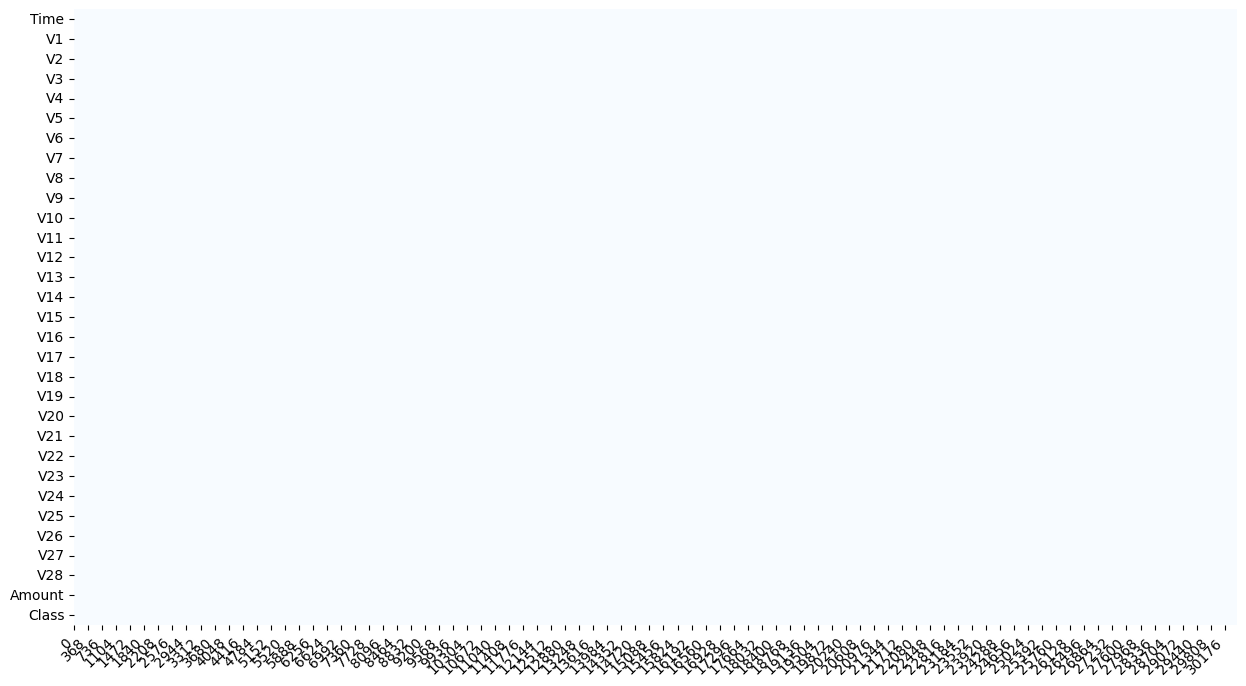

In [ ]:
plot_missing_value(df, return_df=True)

#Dataset Splitting

In [ ]:
X = df.drop(columns=['Class'])
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24393, 30), (6099, 30), (24393,), (6099,))

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42,sampling_strategy='auto')
X_train, y_train = sm.fit_resample(X, y)

#Training

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'Cumulative Explained Variance')

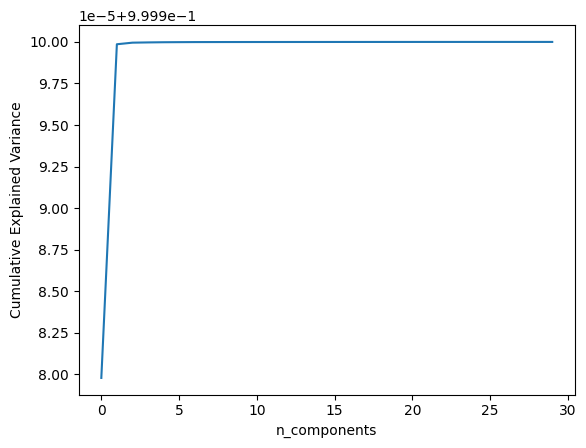

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    #('pca', PCA(n_components=3, whiten=True)),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter = 50, n_jobs=-1, verbose=1, random_state = 42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.2583327274096109, 'algo__gamma': 4, 'algo__learning_rate': 0.02981935017114935, 'algo__max_depth': 5, 'algo__n_estimators': 147, 'algo__reg_alpha': 0.968201208688247, 'algo__reg_lambda': 0.3967633935744863, 'algo__subsample': 0.7246117052470891}
0.9975833333333334 0.9855499999999999 0.998688309558944


,feature,importance,stdev
0,Time,0.025820,0.000515
14,V14,0.002220,0.000170
4,V4,0.001757,0.000198
12,V12,0.000543,0.000125
2,V2,0.000510,0.000079
6,V6,0.000493,0.000040
3,V3,0.000473,0.000100
20,V20,0.000417,0.000038
8,V8,0.000333,0.000051
21,V21,0.000330,0.000069


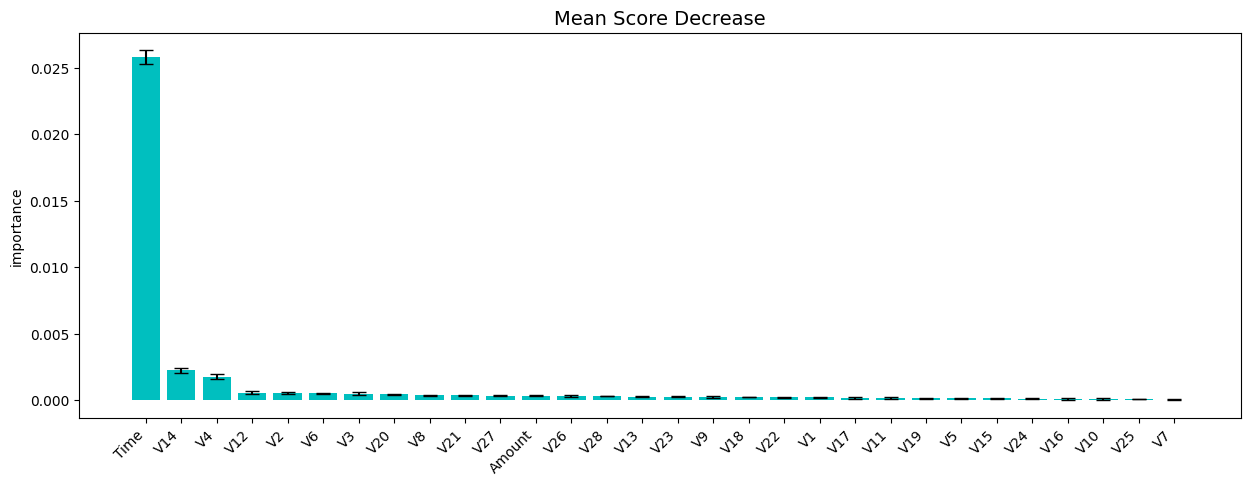

In [25]:
mean_score_decrease(X_train, y_train, model, plot=True, topk=50)

In [26]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA(n_components=4, whiten=True)),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter = 50, n_jobs=-1, verbose=1, random_state = 42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.28714749658136995, 'algo__gamma': 4, 'algo__learning_rate': 0.023426581058204037, 'algo__max_depth': 2, 'algo__n_estimators': 189, 'algo__reg_alpha': 0.06295301484516136, 'algo__reg_lambda': 0.038071583792493945, 'algo__subsample': 0.7633294328968971}
0.9848833333333333 0.8676499999999999 0.9934415477947205


#Confusion Matrix

In [27]:
from jcopml.plot import plot_confusion_matrix

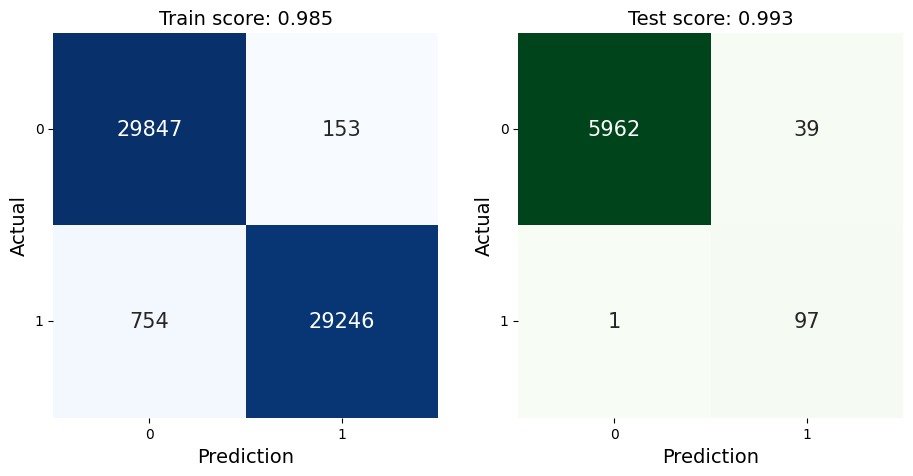

In [28]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [29]:
from jcopml.plot import plot_classification_report

In [30]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report= True)

Train report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30000
           1       0.99      0.97      0.98     30000

    accuracy                           0.98     60000
   macro avg       0.99      0.98      0.98     60000
weighted avg       0.99      0.98      0.98     60000


Test report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6001
           1       0.71      0.99      0.83        98

    accuracy                           0.99      6099
   macro avg       0.86      0.99      0.91      6099
weighted avg       1.00      0.99      0.99      6099

